In [6]:
# GRADIENT DESCENT
# is a statistical tool to maximize, optimize or find something in our models, functions.
from IPython.display import clear_output
from importnb import Notebook
la = Notebook.load("4 linear_algebra.ipynb")
clear_output() # work around to load ipynb file
from typing import List
Vector = List[float]

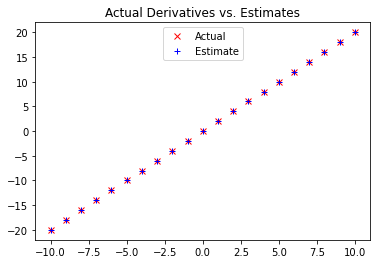

In [10]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return la.dot(v, v)
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h # as h approches 0

def square(x: float) -> float: # for some functions is easy to find the derivate
    return x * x
def derivative(x: float) -> float:
    return 2 * x

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs] # with a h small we can approximate the derivate

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()

In [11]:
# if we want to estimate 2 variables functions, but it increases complexity
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [12]:
# how to use a gradient
# of course we know the minimum of sum of squares is when you input vector like [0,0,0]
# if we iterate and get the gradient, after a few steps we should already be close to [0,0,0]
import random
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = la.scalar_multiply(step_size, gradient) # usually you choose a fixed step based on the problem, or else it could be costly
    return la.add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert la.distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [-1.7528289283516612, 6.808118118010729, -1.480391124638355]
1 [-1.717772349784628, 6.671955755650514, -1.4507833021455878]
2 [-1.6834169027889354, 6.538516640537504, -1.421767636102676]
3 [-1.6497485647331567, 6.407746307726755, -1.3933322833806225]
4 [-1.6167535934384936, 6.27959138157222, -1.36546563771301]
5 [-1.5844185215697237, 6.153999553940776, -1.3381563249587498]
6 [-1.5527301511383294, 6.0309195628619605, -1.3113931984595748]
7 [-1.5216755481155628, 5.910301171604721, -1.2851653344903833]
8 [-1.4912420371532515, 5.792095148172627, -1.2594620278005757]
9 [-1.4614171964101865, 5.676253245209175, -1.2342727872445642]
10 [-1.4321888524819828, 5.562728180304991, -1.209587331499673]
11 [-1.403545075432343, 5.451473616698891, -1.1853955848696796]
12 [-1.3754741739236962, 5.342444144364913, -1.161687673172286]
13 [-1.3479646904452223, 5.235595261477615, -1.1384539197088404]
14 [-1.3210053966363178, 5.130883356248062, -1.1156848413146636]
15 [-1.2945852887035914, 5.028265689123101,

In [14]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual).
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = la.vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.88972945210731, -0.7921278279751214]
1 [10.729758327616445, -0.766653842867064]
2 [26.177484541636957, -0.7643907768537134]
3 [15.87385341995129, -0.746684510758369]
4 [22.746393084381733, -0.7393172883169009]
5 [18.162416495429067, -0.7250922606558854]
6 [21.219943105288156, -0.7154796596391446]
7 [19.180582469113162, -0.7028287572145782]
8 [20.540848664344306, -0.6922425172310359]
9 [19.633561698365117, -0.6803171835322295]
10 [20.238734030006935, -0.6693229874667999]
11 [19.83509507899791, -0.6577456074618594]
12 [20.10433383670093, -0.6465950211679378]
13 [19.92476273589931, -0.635197497288901]
14 [20.04454805765787, -0.6240023395584239]
15 [19.96466244320264, -0.6127097868216492]
16 [20.017957440597016, -0.6015197048048033]
17 [19.982420867416984, -0.5902987079545967]
18 [20.006134982724916, -0.5791356896712705]
19 [19.99032883083281, -0.5679712833092031]
20 [20.00088269855121, -0.5568450119117518]
21 [19.99385439505443, -0.5457304391893771]
22 [19.998553388059506, -0.534645

In [16]:
from typing import TypeVar, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

# we introduce minibatches because we it could be costly to evaluate the gradient with the full dataset
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = la.vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [19.176228999124888, 1.7280408920434736]
1 [21.222232491972786, 1.7820842621861959]
2 [19.90419618443905, 1.8051016258181514]
3 [20.045903176119985, 1.8220156103906342]
4 [20.061404863123457, 1.842143181217035]
5 [20.013464169478087, 1.8607966159817422]
6 [20.037525628152753, 1.8800121476602571]
7 [20.496551479918303, 1.93889757138884]
8 [19.681029401997023, 1.9878681824052595]
9 [19.988020117154292, 2.009540027405698]
10 [20.002581831765994, 2.144477579399028]
11 [19.883809067051853, 2.219931205020795]
12 [20.03187567192488, 2.237273446706127]
13 [19.56755483704561, 2.2802947749056126]
14 [19.851406540712865, 2.404320914313282]
15 [19.99610626673035, 2.4219690192416907]
16 [19.898505718184428, 2.5338709433132163]
17 [19.60723082994323, 2.5918057246409987]
18 [19.974616388115685, 2.6842029179454]
19 [19.63384477867914, 2.72788086677803]
20 [19.89857206014843, 2.7128461615500807]
21 [19.90341211387864, 2.71719931411333]
22 [19.769403102352204, 2.736013200401975]
23 [19.87727492157482,

In [17]:
# an alternative is stochastic gradient descent where you take gradient steps based on one training example at a time:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.098365373923443, 0.10415048830914492]
1 [20.09414448578554, 0.31420086784160134]
2 [20.090105322603595, 0.515239282829855]
3 [20.08623947707293, 0.7076523933920771]
4 [20.08253946624675, 0.8918102574176532]
5 [20.078998232583654, 1.0680670562914096]
6 [20.075608925727177, 1.2367617759012526]
7 [20.072364991191943, 1.3982188569544898]
8 [20.069260272411043, 1.5527488213861949]
9 [20.0662887531997, 1.7006488692219115]
10 [20.063444712120713, 1.842203448492069]
11 [20.060722684069848, 1.977684803316913]
12 [20.058117452091945, 2.1073534979903115]
13 [20.055624002897613, 2.2314589178872626]
14 [20.053237516909856, 2.3502397482776463]
15 [20.050953426944513, 2.4639244339413504]
16 [20.048767320395477, 2.572731618544929]
17 [20.046675030576022, 2.6768705654991907]
18 [20.04467250079203, 2.7765415600861405]
19 [20.04275586234139, 2.871936293631795]
20 [20.040921486597153, 2.963238234012124]
21 [20.039165807329823, 3.05062297795828]
22 [20.037485453064445, 3.1342585878124787]
23 [20.0358